<a href="https://colab.research.google.com/github/Hemu2503/EDA-DA/blob/main/Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6: Dimensionality Reduction

**Name**: Hemanth Vundavilli
**Registration Number**: 21BDS0253

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load a limited number of rows from the dataset
url = 'https://github.com/Hemanth-Vundavilli/EDA-DA/blob/main/Benefits.csv?raw=true'
data = pd.read_csv(url, nrows=3000)  # Load only the first 200 rows

# Inspect data columns
print(data.columns)

# Selecting numeric columns and scaling the features
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

Index(['rownames', 'stateur', 'statemb', 'state', 'age', 'tenure', 'joblost',
       'nwhite', 'school12', 'sex', 'bluecol', 'smsa', 'married', 'dkids',
       'dykids', 'yrdispl', 'rr', 'head', 'ui'],
      dtype='object')


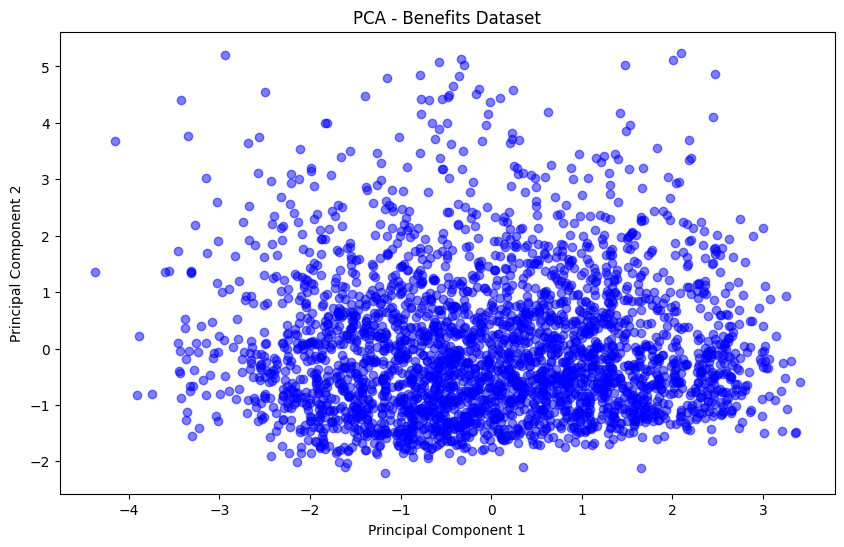

In [2]:
# 6.1 Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)
plt.title("PCA - Benefits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

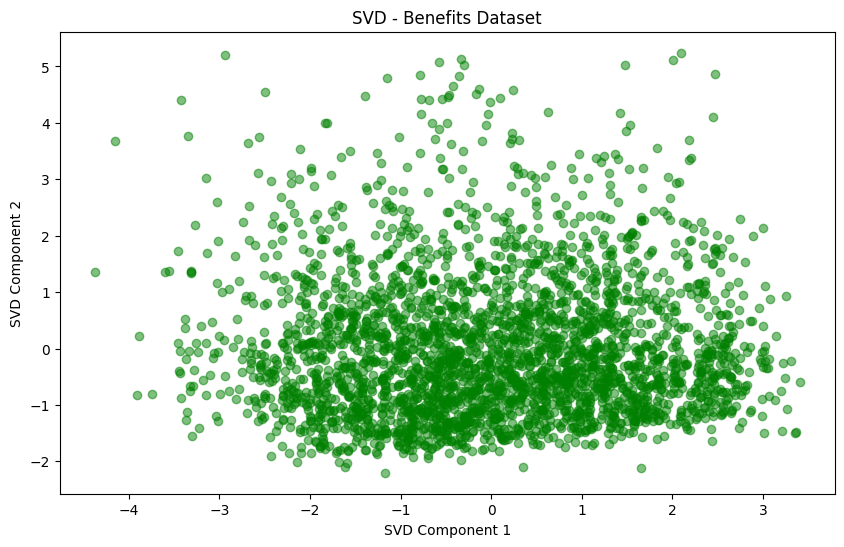

In [3]:
# 6.2 Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], c='green', alpha=0.5)
plt.title("SVD - Benefits Dataset")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

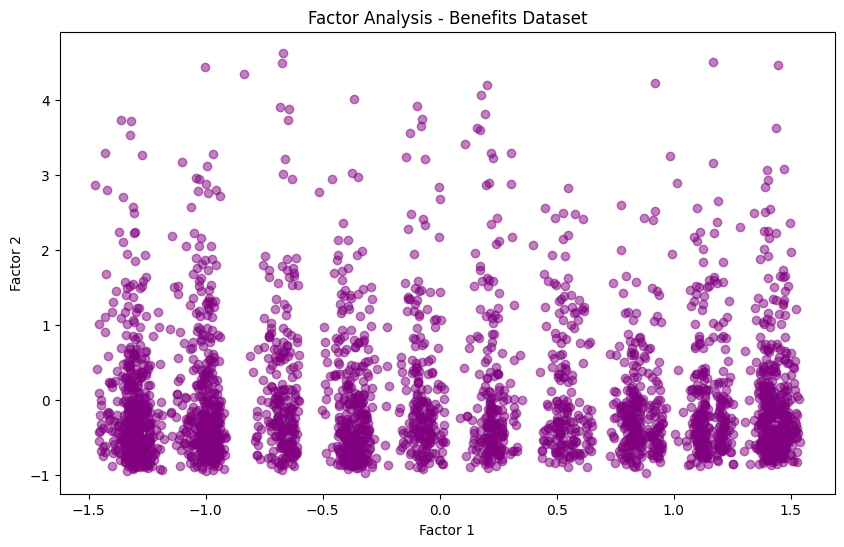

In [4]:
# 6.3 Factor Analysis (FA)
fa = FactorAnalysis(n_components=2, random_state=42)
fa_data = fa.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(fa_data[:, 0], fa_data[:, 1], c='purple', alpha=0.5)
plt.title("Factor Analysis - Benefits Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

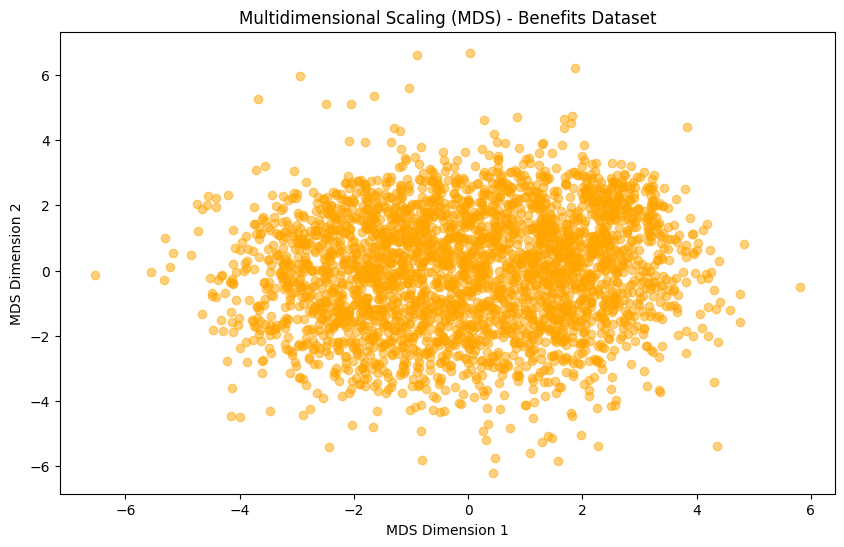

In [5]:
# 6.4.1 Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42, n_init=1, max_iter=100)
mds_data = mds.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], c='orange', alpha=0.5)
plt.title("Multidimensional Scaling (MDS) - Benefits Dataset")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

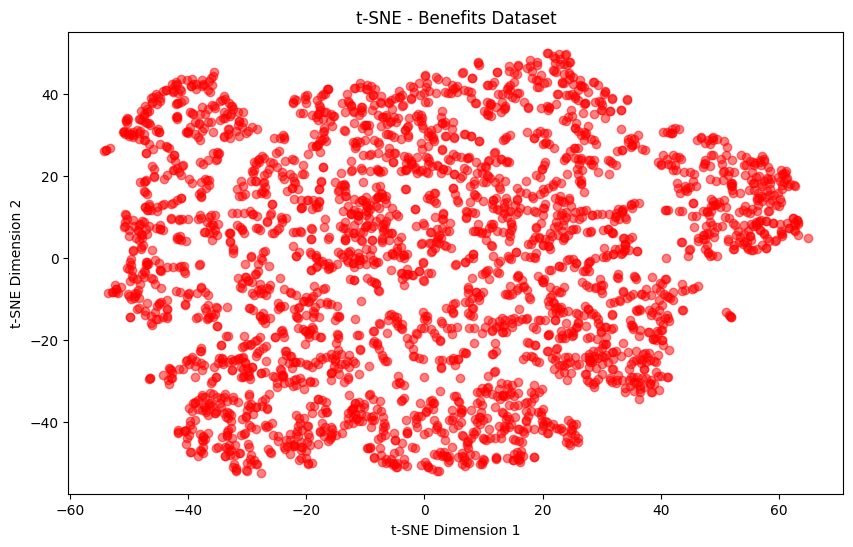

In [6]:
# 6.4.2 Manifold Learning (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='red', alpha=0.5)
plt.title("t-SNE - Benefits Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

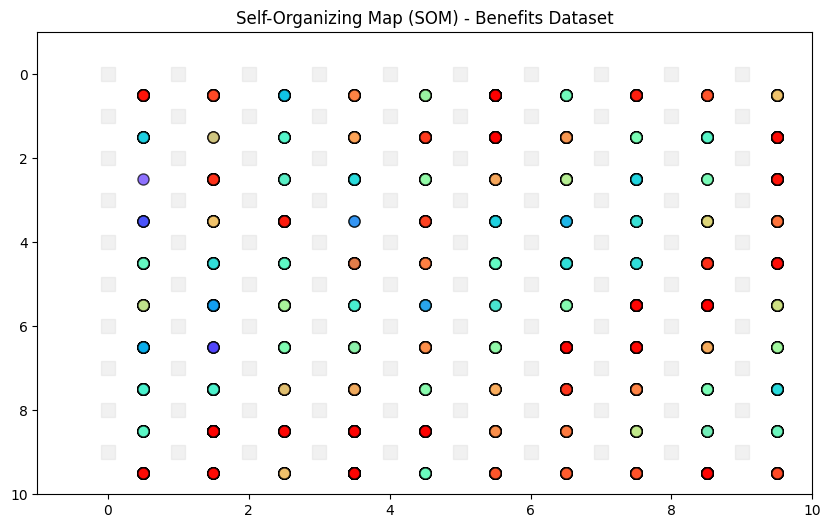

In [7]:
from minisom import MiniSom
import matplotlib.pyplot as plt

# 6.4.3 Self-Organizing Maps (SOM)
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 100)

plt.figure(figsize=(10, 6))

# Background grid for SOM
for i in range(10):
    for j in range(10):
        plt.scatter(i, j, s=100, c='lightgray', alpha=0.3, marker='s')

# Plot each data point in the SOM space
for i, x in enumerate(scaled_data):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.rainbow(i / len(scaled_data)),
             markeredgecolor='k', markersize=8, alpha=0.7)

plt.title("Self-Organizing Map (SOM) - Benefits Dataset")
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.gca().invert_yaxis()
plt.show()